### A simple example of creating a Linear Regression model and converting it to a Tensorflow Lite model

#### 1. Import Library

In [1]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

#### 2. Create Dataset
We will create a model that will calculate the result of this equation formula :

#### Y = MX + C

In [8]:
x = [-1, 0, 1 ,2, 3, 4,]
y = [-3, -1, 1, 3, 5, 7]

#### 3. Build Model

In [9]:
# for simple model we use 1 Dense layer

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=1, input_shape=[1])
])

#### 4. Train Model

In [10]:
model.compile(optimizer= 'sgd', loss= 'mean_squared_error')
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 13.1380
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5660
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5379
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9376
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 5.6740
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 4.6755
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 3.8855
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 3.2598
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 2.7633
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 2.3686
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 2.0541
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 1.8027
Epoch 13/100
1/1 [==============================]

#### 5. Generate SavedModel

In [11]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


#### 6. Convert SavedModel to Tensorflow Lite

In [12]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [13]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

900

#### 7. Initialize the TFLite interpreter to try new Data 

In [14]:
# Load TFLite model and alocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [15]:
# Test the tensorflow lite model on random input data
input_shape = input_details[0]['shape']
inputs, outputs = [], []

for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])
  


#### 8. Visualize the model

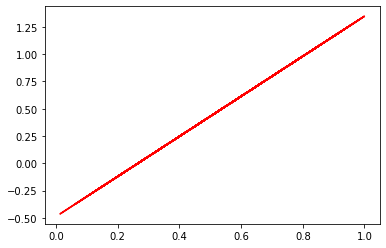

In [16]:
plt.plot(inputs, outputs, 'r')
plt.show()

#### 9. Download the TFLite model file

In [17]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>